<a href="https://colab.research.google.com/github/gauravjoshi1/Semantic-Relations-Classifier/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path = "gdrive/MyDrive/SemEval2010_task8_all_data/SemEval2010_task8_training/TRAIN_FILE.TXT"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
with open(file_path, 'r') as file:
  data = file.read().split("\n\n")[:-1]

count = 0
# represent the data as a list of 3 things
# sentence, semantic relation, comment
semantic_relations = {}

for sentence in data:
  sentence_lines = sentence.split("\n")
  sentence_text = sentence_lines[0].strip().split("\t")[1][1:-1]
  sentence_lines[0] = sentence_text

  # extract the semantic relation
  if ("(" in sentence_lines[1]):
      semantic_relation = sentence_lines[1].split("(")[0]
  else:
      semantic_relation = sentence_lines[1]
  
  # add the semantic relation to the dictionary
  if semantic_relation not in semantic_relations:
      semantic_relations[semantic_relation] = 0
  semantic_relations[semantic_relation] += 1

# print the dictionary of semantic relations
# calculate the total number of relations
total = sum(semantic_relations.values())

# sort the semantic relations by count
semantic_relations = sorted(semantic_relations.items(), key=lambda x: x[1], reverse=True)

print(f"Original Data\n")

# print the total
print(f"TOTAL : {total}")

# print the stats for each semantic relation
for relation, count in semantic_relations:
    percentage = count / total * 100
    print(f"{relation:>20} : {count:>4} ({percentage:>6.2f}%)")



Original Data

TOTAL : 8000
               Other : 1410 ( 17.62%)
        Cause-Effect : 1003 ( 12.54%)
     Component-Whole :  941 ( 11.76%)
  Entity-Destination :  845 ( 10.56%)
    Product-Producer :  717 (  8.96%)
       Entity-Origin :  716 (  8.95%)
   Member-Collection :  690 (  8.62%)
       Message-Topic :  634 (  7.92%)
   Content-Container :  540 (  6.75%)
   Instrument-Agency :  504 (  6.30%)


In [ ]:
preverse_relations = ['Cause-Effect', 'Component-Whole', 'Product-Producer', 'Instrument-Agency']
modified_data = []
semantic_relations = {}

# Clean up the data to only preserve required relations
with open(file_path, 'r') as file:
  data = file.read().split("\n\n")[:-1]

count = 0
# represent the data as a list of 3 things
# sentence, semantic relation, comment
semantic_relations = {}

for sentence in data:
  sentence_lines = sentence.split("\n")
  sentence_text = sentence_lines[0].strip().split("\t")[1][1:-1]
  sentence_lines[0] = sentence_text

  # extract the semantic relation
  if ("(" in sentence_lines[1]):
      semantic_relation = sentence_lines[1].split("(")[0]
  else:
      semantic_relation = sentence_lines[1]

  if semantic_relation not in preverse_relations:
    # update the semantic relation
    semantic_relation = "Other"

    # set the modified semantic relation to pre-processed sentence
    sentence_lines[1] = semantic_relation

  # add the modified line to the list
  modified_data.append("\n".join(sentence_lines))


  # add the semantic relation to the dictionary
  if semantic_relation not in semantic_relations:
      semantic_relations[semantic_relation] = 0
  semantic_relations[semantic_relation] += 1

In [ ]:
# separate each case into sentences and semantic relations
sentences = []
relations = []

for data in modified_data:
    split_data = data.split('\n')
    sentence = split_data[0]
    relation = split_data[1]
    sentences.append(sentence)
    relations.append(relation)



In [ ]:
# print the dictionary of semantic relations
# calculate the total number of relations
total = sum(semantic_relations.values())

# sort the semantic relations by count
semantic_relations = sorted(semantic_relations.items(), key=lambda x: x[1], reverse=True)

print(f"Removing Labels for semantic relations not in use\n")

# print the total
print(f"TOTAL : {total}")

# print the stats for each semantic relation
for relation, count in semantic_relations:
    percentage = count / total * 100
    print(f"{relation:>20} : {count:>4} ({percentage:>6.2f}%)")

Removing Labels for semantic relations not in use

TOTAL : 8000
               Other : 4835 ( 60.44%)
        Cause-Effect : 1003 ( 12.54%)
     Component-Whole :  941 ( 11.76%)
    Product-Producer :  717 (  8.96%)
   Instrument-Agency :  504 (  6.30%)


In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenize the data and convert it to sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# encode semantic relations as integers
unique_relations = list(set(relations))
relation_to_index = {relation: index for index, relation in enumerate(unique_relations)}
encoded_relations = [relation_to_index[relation] for relation in relations]

print(f"unique relations: {unique_relations}")
print(f"relation to index dictionary: {relation_to_index}")
print(f"encoded relation list: {encoded_relations}")

unique relations: ['Other', 'Component-Whole(e2,e1)', 'Product-Producer(e1,e2)', 'Product-Producer(e2,e1)', 'Cause-Effect(e1,e2)', 'Component-Whole(e1,e2)', 'Cause-Effect(e2,e1)', 'Instrument-Agency(e2,e1)', 'Instrument-Agency(e1,e2)']
relation to index dictionary: {'Other': 0, 'Component-Whole(e2,e1)': 1, 'Product-Producer(e1,e2)': 2, 'Product-Producer(e2,e1)': 3, 'Cause-Effect(e1,e2)': 4, 'Component-Whole(e1,e2)': 5, 'Cause-Effect(e2,e1)': 6, 'Instrument-Agency(e2,e1)': 7, 'Instrument-Agency(e1,e2)': 8}
encoded relation list: [1, 0, 7, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 6, 7, 0, 7, 3, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 5, 0, 6, 2, 0, 5, 0, 0, 1, 4, 7, 4, 0, 0, 0, 6, 7, 7, 6, 0, 0, 6, 1, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 6, 0, 3, 6, 6, 7, 0, 4, 0, 2, 0, 0, 6, 6, 0, 0, 5, 0, 7, 0, 7, 6, 0, 6, 6, 0, 0, 6, 7, 6, 0, 5, 7, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 7, 0, 0, 4, 0, 0, 5, 3, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 

In [ ]:
# Dataset overall statistics after preprocessing
# Calculate label distribution
total_count = len(encoded_relations)
label_distribution = {label: encoded_relations.count(relation_to_index[label]) / total_count for label in unique_relations}

# Print label distribution
print(f"Dataset overall statistics after Pre-processing:\n")
print(f"{'Semantic Relation':25s} | {'Total relations across data set':20s} | {'Percentage across data set':40s}")
print("-" * 100)
for label, distribution in label_distribution.items():
    count = encoded_relations.count(relation_to_index[label])
    print(f"{label:25s} {count:20d}  {distribution:30.3%}")

Dataset overall statistics after Pre-processing:

Semantic Relation         | Total relations across data set | Percentage across data set              
----------------------------------------------------------------------------------------------------
Other                                     4835                         60.438%
Component-Whole(e2,e1)                     471                          5.887%
Product-Producer(e1,e2)                    323                          4.038%
Product-Producer(e2,e1)                    394                          4.925%
Cause-Effect(e1,e2)                        344                          4.300%
Component-Whole(e1,e2)                     470                          5.875%
Cause-Effect(e2,e1)                        659                          8.238%
Instrument-Agency(e2,e1)                   407                          5.087%
Instrument-Agency(e1,e2)                    97                          1.213%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Embedding, Attention
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import numpy as np

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300

# Create model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.75))
model.add(Dense(len(unique_relations), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train model
x_train, x_val, y_train, y_val = train_test_split(padded_sequences, encoded_relations, test_size=0.2)

y_train = np.array(y_train)
y_val = np.array(y_val)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=64)


Epoch 1/15
100/100 [==============================] - 75s 703ms/step - loss: 1.4537 - accuracy: 0.6034 - val_loss: 1.2700 - val_accuracy: 0.6256
Epoch 2/15
100/100 [==============================] - 72s 721ms/step - loss: 1.0240 - accuracy: 0.6703 - val_loss: 1.1625 - val_accuracy: 0.6419
Epoch 3/15
100/100 [==============================] - 71s 709ms/step - loss: 0.6963 - accuracy: 0.7647 - val_loss: 1.2124 - val_accuracy: 0.6381
Epoch 4/15
100/100 [==============================] - 74s 746ms/step - loss: 0.4474 - accuracy: 0.8550 - val_loss: 1.2368 - val_accuracy: 0.6831
Epoch 5/15
100/100 [==============================] - 70s 699ms/step - loss: 0.2559 - accuracy: 0.9267 - val_loss: 1.3243 - val_accuracy: 0.6975
Epoch 6/15
100/100 [==============================] - 77s 773ms/step - loss: 0.1328 - accuracy: 0.9659 - val_loss: 1.3656 - val_accuracy: 0.7069
Epoch 7/15
100/100 [==============================] - 77s 777ms/step - loss: 0.0657 - accuracy: 0.9870 - val_loss: 1.5029 - val_ac

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 89, 300)           5865000   
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              439296    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 6,306,609
Trainable params: 6,306,609
Non-trainable params: 0
_________________________________________________________________
None


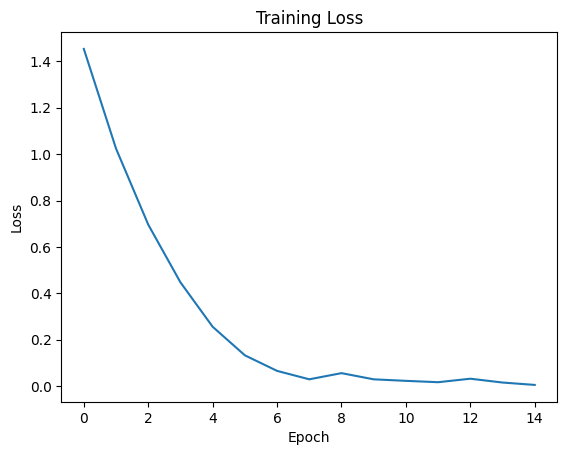

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Statistics for training set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

train_predictions = model.predict(x_train)
train_predicted_labels = [unique_relations[np.argmax(p)] for p in train_predictions]
train_predicted_labels_num = [relation_to_index[label] for label in train_predicted_labels]

print(f"\nTraining Set Statistics\n")

# Calculate and print overall accuracy
train_accuracy = accuracy_score(y_train, train_predicted_labels_num)
print(f"Overall accuracy (training): {train_accuracy}")

# Calculate and print overall precision
train_precision = precision_score(y_train, train_predicted_labels_num, average='macro')

# Calculate and print overall recall for training and validation sets
train_recall = recall_score(y_train, train_predicted_labels_num, average='macro')
print(f"Overall recall (training): {train_recall}")

# Calculate and print overall f1-score
train_f1 = f1_score(y_train, train_predicted_labels_num, average='macro')
print(f"Overall f1-score (training): {train_f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, train_predicted_labels_num)
print(f"\nConfusion matrix:\n{conf_matrix}")

# Generate and print classification report (text format)
report = classification_report(y_train, train_predicted_labels_num, target_names=unique_relations)
print(f"\n\nClassification report:\n{report}\n\n")

# re-generate in dictionary format
report = classification_report(y_train, train_predicted_labels_num, target_names=unique_relations, output_dict=True)

# Calculate label distribution
total_support = sum([report[label]['support'] for label in unique_relations])
label_distribution = {label: report[label]['support'] / total_support for label in unique_relations}

# Print label distribution
print(f"Label distribution:")
for label, distribution in label_distribution.items():
    print(f"{label}: {distribution:.3%}")

200/200 [==============================] - 29s 145ms/step

Training Set Statistics

Overall accuracy (training): 1.0
Overall recall (training): 1.0
Overall f1-score (training): 1.0

Confusion matrix:
[[3878    0    0    0    0    0    0    0    0]
 [   0  366    0    0    0    0    0    0    0]
 [   0    0  254    0    0    0    0    0    0]
 [   0    0    0  304    0    0    0    0    0]
 [   0    0    0    0  275    0    0    0    0]
 [   0    0    0    0    0  377    0    0    0]
 [   0    0    0    0    0    0  545    0    0]
 [   0    0    0    0    0    0    0  315    0]
 [   0    0    0    0    0    0    0    0   86]]


Classification report:
                          precision    recall  f1-score   support

                   Other       1.00      1.00      1.00      3878
  Component-Whole(e2,e1)       1.00      1.00      1.00       366
 Product-Producer(e1,e2)       1.00      1.00      1.00       254
 Product-Producer(e2,e1)       1.00      1.00      1.00       304
     Cause-

In [ ]:
# Generate predictions on validation data
val_predictions = model.predict(x_val)

val_predicted_labels = [unique_relations[np.argmax(p)] for p in val_predictions]

# Convert predicted labels to numerical format
val_predicted_labels_num = [relation_to_index[label] for label in val_predicted_labels]

print(f"\nValidation Set Statistics")

# Calculate overall accuracy
accuracy = accuracy_score(y_val, val_predicted_labels_num)
print(f"Overall accuracy: {accuracy}")

# Calculate overall precision
precision = precision_score(y_val, val_predicted_labels_num, average='macro')
print(f"Overall precision: {precision}")

# Calculate overall recall
recall = recall_score(y_val, val_predicted_labels_num, average='macro')
print(f"Overall recall: {recall}")

# Calculate overall f1-score
f1 = f1_score(y_val, val_predicted_labels_num, average='macro')
print(f"Overall f1-score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_labels_num)
print(f"\nConfusion matrix:\n{conf_matrix}")

# Generate and print classification report (text format)
report = classification_report(y_val, val_predicted_labels_num, target_names=unique_relations)
print(f"\nClassification report:\n{report}\n\n")

# re-generate in dictionary format
report = classification_report(y_val, val_predicted_labels_num, target_names=unique_relations, output_dict=True)

# Calculate label distribution
total_support = sum([report[label]['support'] for label in unique_relations])
label_distribution = {label: report[label]['support'] / total_support for label in unique_relations}

# Print label distribution
print(f"Label distribution:")
for label, distribution in label_distribution.items():
    print(f"{label}: {distribution:.3%}")

50/50 [==============================] - 8s 156ms/step

Validation Set Statistics
Overall accuracy: 0.72
Overall precision: 0.5462126594905742
Overall recall: 0.4868638666977188
Overall f1-score: 0.5091555608752375

Confusion matrix:
[[832  23   8  32   7  32  11  12   0]
 [ 39  39   2   9   4   5   0   7   0]
 [ 32   0  25  12   0   0   0   0   0]
 [ 34   3   3  43   2   0   0   5   0]
 [ 10   1   1   4  44   3   6   0   0]
 [ 34   5   0   0   1  51   1   0   1]
 [ 25   0   5   0   1   3  80   0   0]
 [ 34   3   0  10   0   6   0  38   1]
 [  4   1   0   1   1   2   0   2   0]]

Classification report:
                          precision    recall  f1-score   support

                   Other       0.80      0.87      0.83       957
  Component-Whole(e2,e1)       0.52      0.37      0.43       105
 Product-Producer(e1,e2)       0.57      0.36      0.44        69
 Product-Producer(e2,e1)       0.39      0.48      0.43        90
     Cause-Effect(e1,e2)       0.73      0.64      0.68    

In [ ]:
# Pre-process testing data
test_path = "gdrive/MyDrive/SemEval2010_task8_all_data/SemEval2010_task8_testing_keys/TEST_FILE_FULL.TXT"
test_data = []

# Clean up the data to only preserve required relations
with open(test_path, 'r') as file:
  test_data = file.read().split("\n\n")[:-1]

# pre-process data
test_sentences = []
test_relations = []

for sentence in test_data:
    sentence_lines = sentence.split("\n")
    sentence_text = sentence_lines[0].split("\t")[1][1:-1]
    
    # Extract and pre-process semantic relation
    relation = sentence_lines[1]

    if "(" in relation:
        root_relation = relation.split("(")[0]
        if root_relation in preverse_relations:
          test_relations.append(relation)
        else:
          test_relations.append("Other")
    else:
        test_relations.append("Other")
    
    test_sentences.append(sentence_text)


In [ ]:
# Pre-process test data
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')
test_encoded_relations = [relation_to_index[relation] for relation in test_relations]

In [ ]:
test_encoded_relations = np.array(test_encoded_relations)
test_loss, test_acc = model.evaluate(test_padded_sequences, test_encoded_relations)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

85/85 [==============================] - 10s 115ms/step - loss: 1.9098 - accuracy: 0.7449
Test Loss: 1.9097561836242676
Test Accuracy: 0.7449392676353455


In [ ]:
# to view the results
predictions = model.predict(test_padded_sequences)
predicted_labels = [unique_relations[np.argmax(p)] for p in predictions]

85/85 [==============================] - 11s 128ms/step


In [ ]:
# Statistics for test 
test_predictions = model.predict(test_padded_sequences)
test_predicted_labels = [unique_relations[np.argmax(p)] for p in test_predictions]

# Convert predicted labels to numerical format
test_predicted_labels_num = [relation_to_index[label] for label in test_predicted_labels]

print(f"\nValidation Set Statistics")

# Calculate overall accuracy
accuracy = accuracy_score(test_encoded_relations, test_predicted_labels_num)
print(f"Overall accuracy: {accuracy}")

# Calculate overall precision
precision = precision_score(test_encoded_relations, test_predicted_labels_num, average='macro')
print(f"Overall precision: {precision}")

# Calculate overall recall
recall = recall_score(test_encoded_relations, test_predicted_labels_num, average='macro')
print(f"Overall recall: {recall}")

# Calculate overall f1-score
f1 = f1_score(test_encoded_relations, test_predicted_labels_num, average='macro')
print(f"Overall f1-score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_encoded_relations, test_predicted_labels_num)
print(f"\nConfusion matrix:\n{conf_matrix}")

# Generate and print classification report (text format)
report = classification_report(test_encoded_relations, test_predicted_labels_num, target_names=unique_relations)
print(f"\nClassification report:\n{report}\n\n")

# re-generate in dictionary format
report = classification_report(test_encoded_relations, test_predicted_labels_num, target_names=unique_relations, output_dict=True)

# Calculate label distribution
total_support = sum([report[label]['support'] for label in unique_relations])
label_distribution = {label: report[label]['support'] / total_support for label in unique_relations}

# Print label distribution
print(f"Label distribution:")
for label, distribution in label_distribution.items():
    print(f"{label}: {distribution:.3%}")



85/85 [==============================] - 11s 125ms/step

Validation Set Statistics
Overall accuracy: 0.7449392712550608
Overall precision: 0.5711559964061931
Overall recall: 0.5059801802209386
Overall f1-score: 0.5301593983279709

Confusion matrix:
[[1498   39   13   41    9   48   15   24    3]
 [  60   46    0   14    1   17    0    8    4]
 [  41    5   43   11    0    3    3    0    2]
 [  50    4    3   53    2    2    0    7    2]
 [  17    3    0    2   81    5   25    1    0]
 [  53    6    0    3    0   94    1    3    2]
 [  28    0    5    1    1    0  158    1    0]
 [  59    5    0   10    1    8    2   47    2]
 [   9    3    2    0    2    0    0    2    4]]

Classification report:
                          precision    recall  f1-score   support

                   Other       0.83      0.89      0.85      1690
  Component-Whole(e2,e1)       0.41      0.31      0.35       150
 Product-Producer(e1,e2)       0.65      0.40      0.49       108
 Product-Producer(e2,e1)     

In [ ]:
# manual analysis 50 random sentences
# Pre-process testing data
manual_analysis_path = "gdrive/MyDrive/SemEval2010_task8_all_data/SemEval2010_task8_testing_keys/manual_analysis.txt"
manual_analysis_data = []

# Clean up the data to only preserve required relations
with open(manual_analysis_path, 'r') as file:
  manual_analysis_data = file.read().split("\n\n")[:-1]

# pre-process data
manual_test_sentences = []
manual_test_relations = []
manual_test_sentence_ids = []

for sentence in manual_analysis_data:
    sentence_lines = sentence.split("\n")
    sentence_id, sentence_text = sentence_lines[0].split("\t")
    
    # Extract and pre-process semantic relation
    relation = sentence_lines[1]

    if "(" in relation:
        root_relation = relation.split("(")[0]

        if root_relation in preverse_relations:
          manual_test_relations.append(relation)
        else:
          manual_test_relations.append("Other")
    else:
        manual_test_relations.append("Other")
    
    manual_test_sentences.append(sentence_text)
    manual_test_sentence_ids.append(sentence_id)


print("number of sentences is",  len(manual_test_sentences))

number of sentences is 55


In [ ]:
# Pre-process test data
manual_test_sequences = tokenizer.texts_to_sequences(manual_test_sentences)
manual_test_padded_sequences = pad_sequences(manual_test_sequences, maxlen=max_length, padding='post')
manual_test_encoded_relations = [relation_to_index[relation] for relation in manual_test_relations]

manual_test_encoded_relations = np.array(manual_test_encoded_relations)
m_test_loss, m_test_acc = model.evaluate(manual_test_padded_sequences, manual_test_encoded_relations)
print('Test Loss:', m_test_loss)
print('Test Accuracy:', m_test_acc)

# to view the results
predictions = model.predict(manual_test_padded_sequences)
predicted_labels = [unique_relations[np.argmax(p)] for p in predictions]


2/2 [==============================] - 0s 166ms/step - loss: 1.9706 - accuracy: 0.7455
Test Loss: 1.9706395864486694
Test Accuracy: 0.7454545497894287
2/2 [==============================] - 0s 152ms/step


In [ ]:
# Compare predicted labels with true labels
incorrect_readings = 0

print(f"Incorrect readings are as follows:\n")

for i in range(len(manual_test_relations)):
    if manual_test_relations[i] != predicted_labels[i]:
        incorrect_readings += 1
        print(f"Sentence ID: {manual_test_sentence_ids[i]}")
        print(f"Text: {manual_test_sentences[i]}")
        print(f"Expected label: {manual_test_relations[i]}")
        print(f"Predicted label: {predicted_labels[i]}\n")

print(f"Total incorrect readings are {incorrect_readings} out of {len(manual_test_sentences)}")

Incorrect readings are as follows:

Sentence ID: 10278
Text: "Additionally, all <e1>hydrants</e1> and valves are pressure tested at the manufacturing <e2>facility</e2>."
Expected label: Product-Producer(e1,e2)
Predicted label: Product-Producer(e2,e1)

Sentence ID: 10306
Text: "The choice was recorded when the <e1>cow</e1> touched the training card with its <e2>nuzzle</e2>."
Expected label: Component-Whole(e2,e1)
Predicted label: Instrument-Agency(e2,e1)

Sentence ID: 10311
Text: "The children, seated on their mother's laps, played with toys on a table in front of a <e1>picture</e1> with <e2>holes</e2> in it."
Expected label: Component-Whole(e2,e1)
Predicted label: Other

Sentence ID: 10315
Text: "She tried to find out what <e1>key</e1> on your <e2>keyboard</e2> fits your personalty."
Expected label: Component-Whole(e1,e2)
Predicted label: Instrument-Agency(e1,e2)

Sentence ID: 10317
Text: "Adler's <e1>belief</e1> in human teleology was a radical departure from the "cause-and-effect" <e